<a href="https://colab.research.google.com/github/Grey-matter2020/Machine-Learning/blob/main/Notebook/Visualization/Exploratory_Data_Analysis_Haberman_Dataset_Matplotlib_%26_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective of Heberman data analysis

## To perform Exploratory data analysis on Haberman dataset to understand which features can help us predict the survival chance of cancer patients after 5 years of operation

In [ ]:
# Connect to the Google Drive to read the iris.csv file
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#List the files in the Visualization folder
!ls "/content/gdrive/My Drive/Machine Learning/Visualization"

'Exploratory Data Analysis - Haberman Dataset-Matplotlib & Seaborn.ipynb'
'Exploratory Data Analysis - Iris Dataset - Matplotlib & Seaborn.ipynb'
 haberman.csv
 iris.csv


In [ ]:
#Changing the directory to Visualization
%cd "/content/gdrive/My Drive/Machine Learning/Visualization"

/content/gdrive/My Drive/Machine Learning/Visualization


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#Loading the Haberman dataset'
haberman=pd.read_csv('haberman.csv')

##  Understanding the structure of the data and some basic stats around it

In [ ]:
#Haberman data set has 306 line items
haberman.shape

(306, 4)

The data has four columns(features)
* Understanding the data
* Age=Age of patient at time of operation (numeric)
* Patient’s year of operation (numeric)
* Number of positive nodes detected (numerical)
* Survival status (1 = the patient survived more than 5 yrs, 2 = the patient died within 5 years)

In [ ]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


* We see all 4 columns have the same number of data points so no missing value
* If we see nodes show a very high variance in data with range being 0 to 52 and 75% of people having less than 4 nodes

In [ ]:
haberman['status'].value_counts()


1    225
2     81
Name: status, dtype: int64

* Haberman data set doesnt have balanced dataset
* This needs to be handled when we get into modelling as baised data can create high prediction error for the class with lower representation

## Univariate Analysis using Distribution plot

* Let us perform some univariate analysis. This analysis helps us to understand the impact of any one variable on the outcome
* Though beyond the scope of this execrcise, models which can predict outcome with fewer variable are more efficient as adding additional varaible can cause overfitting

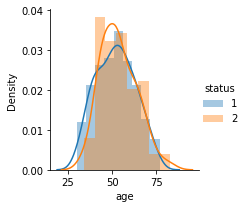

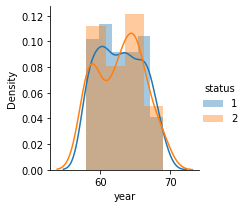

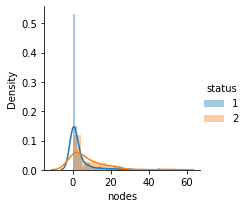

In [ ]:
sns.FacetGrid(data=haberman,hue='status').map(sns.distplot,'age').add_legend()
sns.FacetGrid(data=haberman,hue='status').map(sns.distplot,'year').add_legend()
sns.FacetGrid(data=haberman,hue='status').map(sns.distplot,'nodes').add_legend()

* The univariate analysis shows that each variable (age,year.nodes) have almost 90% overlap for survival and non survival  chnace and hence individually none of the variables are good enough for prediction
* The node variable does seem to perform better than other two variables and lets see that in detail to see if we have some intution from it


## Univariate Analysis using Distribution plot for No of nodes(only)

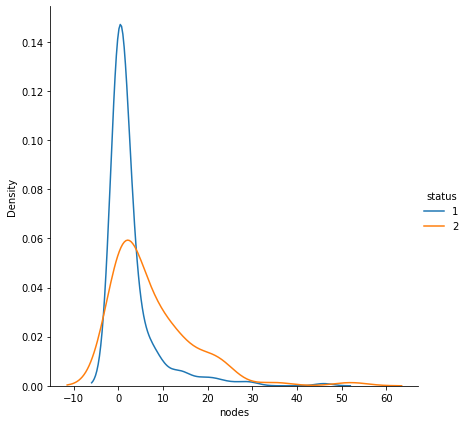

In [ ]:
sns.FacetGrid(data=haberman,hue='status',height=6).map(sns.kdeplot,'nodes').add_legend()
sns.set_style("whitegrid")


* From the below graph crudely we can say if the no of nodes is <=4 then the probability of survival is much higher and vice versa
* Lets built more intution around this by plotting a histogram and CDF plot

## Histogram for feature No of Nodes

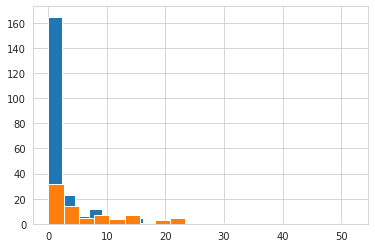

In [ ]:
plt.hist(haberman[haberman['status']==1]['nodes'],bins=20)
plt.hist(haberman[haberman['status']==2]['nodes'],bins=20)
sns.set_style("whitegrid")

* At nodes less less than 4 chances of survival is very high as ~170 of 225 who survived has nodes less than 4
* At nodes greater than 4 survival and non survival almost becomes equal as almost same no of people are surviving and not surviving

## Univariate analysis using Violin plot which is a mix of box plot and kde plot

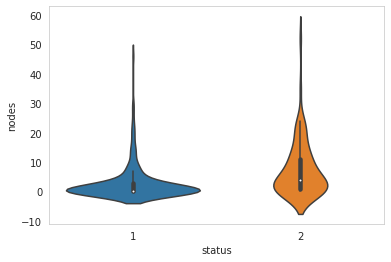

In [ ]:
plt.grid()
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
sns.set_style("whitegrid")


## KDE and CDF for Feature No of Nodes

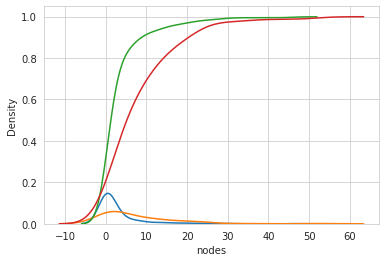

In [ ]:
sns.kdeplot(haberman[haberman['status']==1]['nodes'],cumulative=False,gridsize=200)
sns.kdeplot(haberman[haberman['status']==2]['nodes'],cumulative=False,gridsize=200)
sns.kdeplot(haberman[haberman['status']==1]['nodes'],cumulative=True,gridsize=200)
sns.kdeplot(haberman[haberman['status']==2]['nodes'],cumulative=True,gridsize=200)
sns.set_style("whitegrid")

## Plotting CDF& PDF using histogram bin method

* Nodes less than 0 is not a possible situation as per the data available so we can assume negative nodes and having 0 nodes
* The sharp increase in blue graph of survival indicates at lower nodes % of folks surviving is very high compared to non surviving
* 50% of people who survived had nodes=0 compared to just around 25% of those who didnt
* Similarly 85% who survived has nodes<=4 compared to just 50% of those who didnt
* However we still cannot predict on an individual case basis of survival and non survival.But we can conclude that at lower nodes survival chances are higher

In [ ]:
haberman['status'].value_counts()

In [ ]:
haberman[haberman['status']==1]['nodes'].value_counts()

0     117
1      33
2      15
3      13
4      10
7       5
8       5
6       4
14      3
9       2
22      2
5       2
10      2
11      1
15      1
20      1
13      1
16      1
12      1
46      1
19      1
18      1
30      1
25      1
28      1
Name: nodes, dtype: int64

In [ ]:
haberman[haberman['status']==2]['nodes'].value_counts()

0     19
1      8
3      7
2      5
13     4
9      4
5      4
4      3
11     3
6      3
23     3
19     2
7      2
15     2
8      2
20     1
52     1
10     1
21     1
24     1
12     1
14     1
35     1
17     1
22     1
Name: nodes, dtype: int64

## Bivariate analysis using Scatter plot

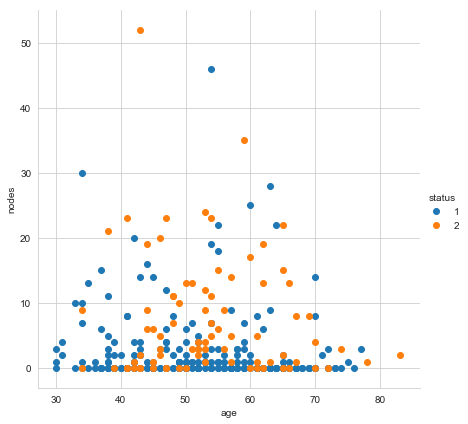

In [ ]:

sns.FacetGrid(data=haberman,hue='status',height=6).map(plt.scatter,'age','nodes').add_legend()
sns.set_style("whitegrid")
#A scatter plot between age and node doesnt not give any insights to determine whether a patient will survive or not
#However it does tell that at age <40 people mostly survive irrespective of the no of nodes

* To determine if there is any other combination that can help we will plot pairplots
* ALL diagonal graphs are univariate analysis and off didgonal graphs are bi variate

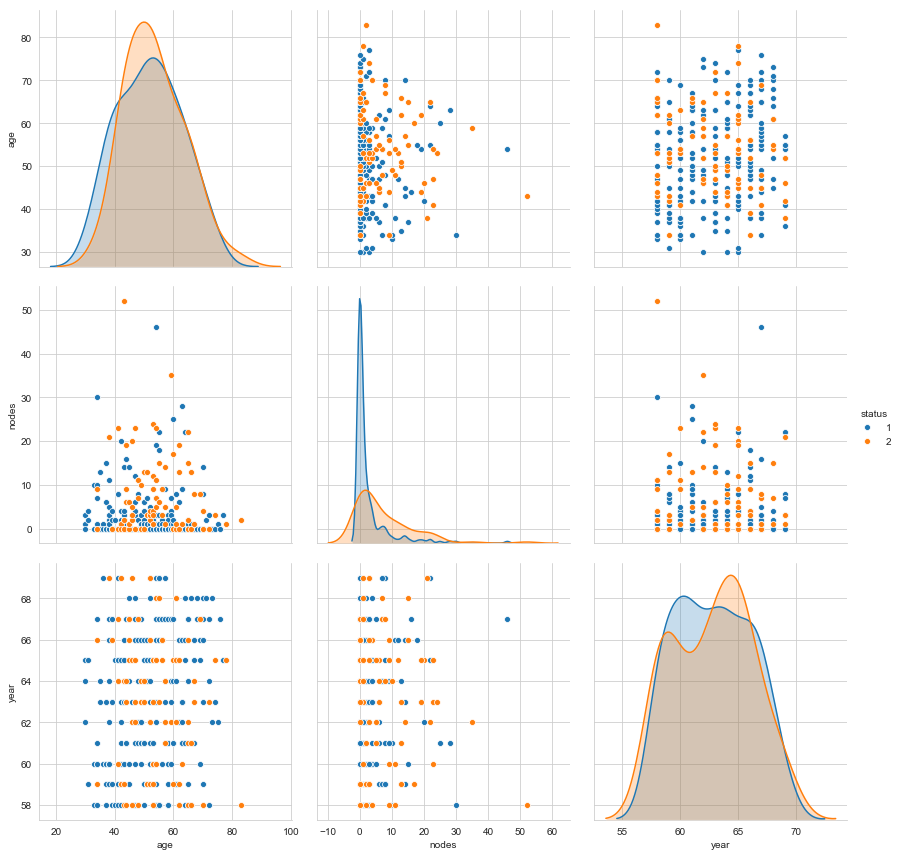

In [ ]:

sns.pairplot(haberman,vars=["age","nodes","year"],hue='status',size=4)
sns.set_style("whitegrid")


* All the pairplots show that data for patients who survived and those who didnt overlap for all features and hence it is not clear to show which feature can help us predict
* Note that in most graphs it looks like orange and blue points are almost equal however due to heavy overlap on lower nodes most of the blue points have got hidden

## Conclusions
* Current we are not able to find any combination of features that can help to predict the survival rate due to overlap of data.
* We are not able to linearly separate the groups and hence more complex techniques needs to be looked into
* Nodes indivually go give some idea into the survival chances however but doesn not suffice the objective to be able to categorise the data
* If we do attempt to make a model, predicting survival if nodes<=4 then we might be making an error of the rate of 20%
* Additionally if we say nodes >4 will not survive the error rate would be almost 50%

In [ ]:
# No of survivors with nodes <= 4 = 183
# No of non survivors with nodes <=4 = 42
# Error rate = 42/(42+183) = 42/225 = ~20%

In [ ]:
# No of survivors with nodes >4 = 225-183 = 42
# No of non survicors with nodes >4 = 81-42 =39
# Error rate = 41/81 = ~50%